** ## The first galaxy was observed by a Persian astronomer Abd al-Rahman over 1,000 years ago, and it was first believed to be an unknown extended structure. which is now known as Messier-31 or the infamous Andromeda Galaxy. From that point on, these unknown structures are more frequently observed and recorded, but it took more than 9 centuries for astronomers to manifest on an agreement that they were not just astronomical objects, but entire galaxies.
As the discoveries and classification of galaxies increased, several astronomers observed the divergent morphologies. Then, they started grouping previously reported galaxies and newly discovered galaxies based on morphological features which then formed a meaningful classification scheme.**

##Galaxy Classification Model

Astronomy in this contemporary era has evolved massively in parallel with advances in computing over the years. Sophisticated computational techniques such as machine learning models are much more efficient now due to the dramatically increased efficiency in computer performance and huge data available to us today. 

Long Centuries ago, the galaxy classification was done by hand with a massive group of experienced people, who used to evaluate the results by using cross-validation algorithm.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

#Reading the data
from google.colab import files
uploaded = files.upload()
zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head()

Saving GalaxyZoo1_DR_table2.csv to GalaxyZoo1_DR_table2 (1).csv


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [6]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

As this is a Galaxy classification model, so we have to check the class imbalance, in a dataset where we perform classification task even though its class binary imbalance may have a major effect in the phase training, and ultimately on precision. To plot the value_counts for three-class columns, we can do it like the code below:

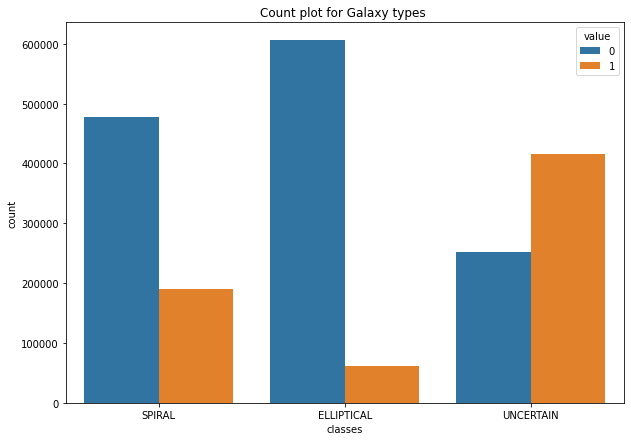

In [8]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplot= data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x='variable',hue='value',data=pd.melt(countplot))
plt.xlabel('classes')
plt.show()

## Splitting The Data

For any machine learning model that learns from data, this is a conventional method of dividing the original data into training sets and test sets, where the allocation percentages are 80% d training set and 20% test set. and the data set at least should have 1000 data points to avoid overfitting and to simply increase the training period of any model. So now let’s split the data into training and test sets:

In [9]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Building Neural Networks for Galaxy Classification Model:
Sequential, in Keras, allows us to build the Multilayered Perceptron model from scratch. We can add each layer with a unit number as a parameter of the Dense function where each unit number implies that many densely connected neurons. Now let’s build neural networks using TensorFlow and Keras:

In [11]:
  from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Now let’s fit the data into our neural network. It will take some time to run as the data is itself very large and neural network models take time to run:

In [14]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 41s 2ms/step - loss: 0.2865 - accuracy: 0.8759
Epoch 2/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2658 - accuracy: 0.8869
Epoch 3/20
16699/16699 [==============================] - 40s 2ms/step - loss: 0.2616 - accuracy: 0.8891
Epoch 4/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2526 - accuracy: 0.8931
Epoch 5/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2493 - accuracy: 0.8940
Epoch 6/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2429 - accuracy: 0.8952
Epoch 7/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2389 - accuracy: 0.8955
Epoch 8/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2363 - accuracy: 0.8958
Epoch 9/20
16699/16699 [==============================] - 39s 2ms/step - loss: 0.2345 - accuracy: 0.8956
Epoch 10/20
16699/16699 [==============================

NameError: ignored

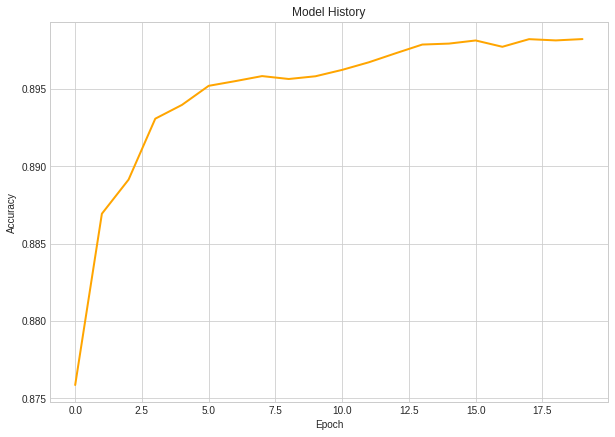

In [15]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

From this precision graph, we can deduce that after a certain epoch, i.e. approximately from the 6th epoch, the precision remained constant for all other epochs. Now let’s take our model through the confusion matrix algorithm and print a classification report:

In [16]:
y_pred = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test.argmax(axis=1),y_pred)
print(classification_report(y_test.argmax(axis=1),y_pred))

AttributeError: ignored